# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices thru One-hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


2024-09-24 18:36:22.173201: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 18:36:22.173259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 18:36:22.174412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 18:36:22.181079: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 18:36:22.908415: W tensorflow/compiler/tf2

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
# Your code here :

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(x_train.dtype)
print(x_train.ndim)

""" read below -
50000: Number of images.
32: Height of each image (in pixels).
32: Width of each image (in pixels).
3: Number of color channels (RGB).
it is 4 dimension matrix """

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
float32
4


' read below -\n50000: Number of images.\n32: Height of each image (in pixels).\n32: Width of each image (in pixels).\n3: Number of color channels (RGB).\nit is 4 dimension matrix '

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Your code here :

# DEFINE the Model

input_shape = (32, 32, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

2024-09-24 18:36:29.035208: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 18:36:29.084281: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 18:36:29.084477: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
# Your code here :
# COMPILE the Model

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              


                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dropout (Dropout)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722006 (2.75 MB)
Trainable params: 722006 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# TRAIN the model with 50 epochs and batch size of 512

history = model.fit(x_train, y_train, batch_size=512, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 6ms/step - loss: 1.8011 - accuracy: 0.3669
Epoch 2/50
98/98 [==============================] - 1s 6ms/step - loss: 1.7780 - accuracy: 0.3755
Epoch 3/50
98/98 [==============================] - 1s 6ms/step - loss: 1.7525 - accuracy: 0.3857
Epoch 4/50
98/98 [==============================] - 1s 6ms/step - loss: 1.7263 - accuracy: 0.3928
Epoch 5/50
98/98 [==============================] - 1s 7ms/step - loss: 1.7009 - accuracy: 0.4024
Epoch 6/50
98/98 [==============================] - 1s 7ms/step - loss: 1.6777 - accuracy: 0.4099
Epoch 7/50
98/98 [==============================] - 1s 7ms/step - loss: 1.6552 - accuracy: 0.4167
Epoch 8/50
98/98 [==============================] - 1s 7ms/step - loss: 1.6331 - accuracy: 0.4258
Epoch 9/50
98/98 [==============================] - 1s 7ms/step - loss: 1.6120 - accuracy: 0.4305
Epoch 10/50
98/98 [==============================] - 1s 7ms/step - loss: 1.5898 - accuracy: 0.4391
Epoch 11/50
98/98 [

*   Plot the cross entropy loss curve and the accuracy curve

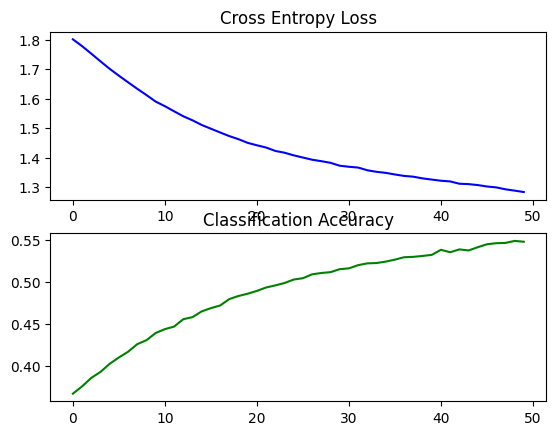

In [8]:
# Your code here :

# PLOT loss and accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

In [11]:
# Evaluate the model with test data

# Print the test loss and accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2628 - accuracy: 0.5573


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
# Your code here :

# DEFINE the new Model (with another layer - deeper)

input_shape = (32, 32, 3)

model_dp = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),  # Added padding='same'
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),  # Added padding='same' & Extra layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),     #Dense increase to 128 from 100
        layers.Dense(10, activation="softmax"),
    ]
)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Your code here :

# COMPILE the Model

model_dp.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

model_dp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                        

In [15]:
# Your code here :
# TRAIN the model with 50 epochs and batch size of 512- Same as before

history1 = model_dp.fit(x_train, y_train, batch_size=512, epochs=50)

Epoch 1/50
98/98 [==============================] - 3s 16ms/step - loss: 2.2855 - accuracy: 0.1417
Epoch 2/50
98/98 [==============================] - 1s 10ms/step - loss: 2.1841 - accuracy: 0.2078
Epoch 3/50
98/98 [==============================] - 1s 10ms/step - loss: 2.0440 - accuracy: 0.2547
Epoch 4/50
98/98 [==============================] - 1s 11ms/step - loss: 1.9821 - accuracy: 0.2832
Epoch 5/50
98/98 [==============================] - 1s 10ms/step - loss: 1.9370 - accuracy: 0.3085
Epoch 6/50
98/98 [==============================] - 1s 11ms/step - loss: 1.8949 - accuracy: 0.3282
Epoch 7/50
98/98 [==============================] - 1s 10ms/step - loss: 1.8624 - accuracy: 0.3393
Epoch 8/50
98/98 [==============================] - 1s 11ms/step - loss: 1.8311 - accuracy: 0.3548
Epoch 9/50
98/98 [==============================] - 1s 11ms/step - loss: 1.8036 - accuracy: 0.3634
Epoch 10/50
98/98 [==============================] - 1s 11ms/step - loss: 1.7766 - accuracy: 0.3727
Epoch 11/

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

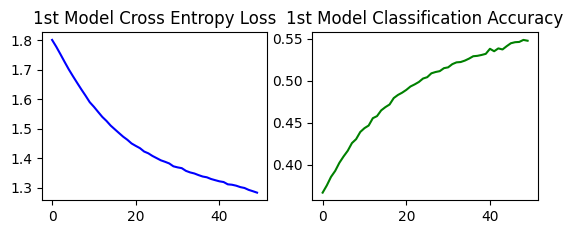

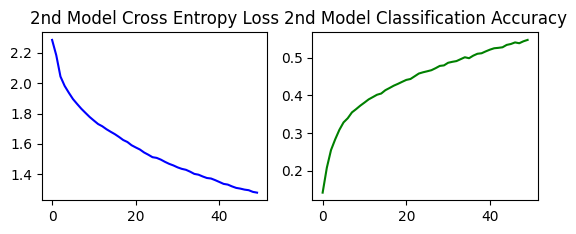

In [27]:
# Your code here :

# PLOT loss and accuracy curve for Model1 and Model2(deeper model)

plt.subplot(221)
plt.title('1st Model Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(222)
plt.title('1st Model Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

plt.subplot(223)
plt.title('2nd Model Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')

plt.subplot(224)
plt.title('2nd Model Classification Accuracy')
plt.plot(history1.history['accuracy'], color='green', label='train')
plt.show()

In [28]:
# Evaluate the model with test data
test_loss, test_accuracy = model_dp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2423 - accuracy: 0.5610


**Comment on the observation**

*(Double-click or enter to edit)*

Model 1: 
    Had a Total parameter of 722006. 
    loss: 1.2830 & accuracy: 0.5475 after 50 Epochs on the Training Data
    
Model 2: 
    Had a Total parameter of 1060138. 
    loss: 1.2779 & accuracy: 0.5472 after 50 Epochs on the Training Data

Despite improving the total no. of parameters by adding additional layer, padding technique and increasing the Dense (neuron) Count, the performance is almost Insignificant. This implies the random nature of global minimum value function. We also saw this with the Spiral chart exercise, that despite increasing the parameters the overall accuracy & loss didn't improve. Also understood the significance of the weighs of the Pre-trained models. 
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [33]:
# Your code here :

# Predicting the output for the test split
#y_pred = model.predict(x_test)

# use argmax function to findout which class has the highest probability
#y_pred_classes = np.argmax(y_pred, axis=1)  


#y_pred_dp = model_dp.predict(x_test)
y_test
#y_pred_classes


: 

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
